# GRUPO 1: PURO HUESO
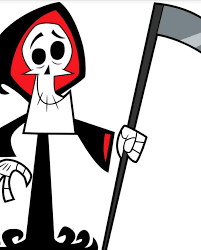

               
   **NOTEBOOK 1**
                         
                         
   **LECTURA Y LIMPIEZA DE DATASET**

In [1]:
#1 Importar librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [2]:
#2 leer archivo csv
defunciones = pd.read_csv('arg_def_15_21.csv')

In [3]:
#3 Chequeamos que leyó el archivo
defunciones.head()

,region,jurisdiccion,mes_anio_defuncion,mes_def,anio_def,sexo_id,sexo_nombre,grupo_etario,grupo_causa_defuncion_CIE10,cod_causa_muerte_CIE10,cantidad
0,1.Centro,6.Prov. Bs.As.,09/2015,9,2015,1,1.Varones,01.menor a 20 anios,1500 AFECC PERINATALES,P21,1
1,1.Centro,6.Prov. Bs.As.,09/2015,9,2015,1,1.Varones,01.menor a 20 anios,"1600 MALFORM CONGENITAS, DEFORM Y ANOM CROM...",Q60,1
2,1.Centro,6.Prov. Bs.As.,08/2015,8,2015,1,1.Varones,01.menor a 20 anios,"1600 MALFORM CONGENITAS, DEFORM Y ANOM CROM...",Q24,1
3,1.Centro,6.Prov. Bs.As.,05/2015,5,2015,1,1.Varones,01.menor a 20 anios,1000 ENF SISTEMA RESPIRATORIO,J18,1
4,1.Centro,6.Prov. Bs.As.,10/2015,10,2015,1,1.Varones,01.menor a 20 anios,1500 AFECC PERINATALES,P36,1


In [4]:
defunciones['grupo_causa_defuncion_CIE10'].unique()

array(['1500 AFECC  PERINATALES',
       '1600 MALFORM  CONGENITAS, DEFORM  Y ANOM  CROMOSOMICAS',
       '1000 ENF SISTEMA RESPIRATORIO', '0500 TRAST METABOLICOS',
       '0100 CIERTAS ENF INFECCIOSAS Y PARASITARIAS',
       '1900 SIGNOS, SINTOMAS Y AFECCIONES MAL DEFINIDAS Y DESCONOCIDAS',
       '1300 ENF  DEL SISTEMA URINARIO',
       '0900 ENF  DEL SISTEMA CIRCULATORIO',
       '1800 DEMAS CAUSAS DEFINIDAS', '1700 CAUSAS EXTERNAS',
       '0200 T MALIGNOS', '1200 ENF  DEL HIGADO',
       '0300 DIABETES MELLITUS', '0800 TRASTORNOS MENTALES Y DEL COMP',
       '1400 EMBARAZO, PARTO Y PUERPERIO',
       '0299 C IN SITU, TUM BEN  Y COMP INCIERTO',
       '1100 APEND , HERNIA CAV  ABDOM Y OBSTR  INTEST ',
       '0600 MENINGITIS', '0700 ENF  DE ALZHEIMER',
       '0400 DEF  Y ANEMIAS NUTRICION'], dtype=object)

## Revisar tipo de datos en el dataset

In [5]:
# Usamos dtypes para chequear tipo de datos
defunciones.dtypes

region                         object
jurisdiccion                   object
mes_anio_defuncion             object
mes_def                         int64
anio_def                        int64
sexo_id                         int64
sexo_nombre                    object
grupo_etario                   object
grupo_causa_defuncion_CIE10    object
cod_causa_muerte_CIE10         object
cantidad                        int64
dtype: object

In [6]:
# Asigno variable al total de filas y de columnas
num_filas,num_columnas=defunciones.shape
print( f"El dataset tiene {num_filas} filas en total y tiene {num_columnas} columnas")

El dataset tiene 2516784 filas en total y tiene 11 columnas


In [7]:
# Chequeo de info de dataset
defunciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516784 entries, 0 to 2516783
Data columns (total 11 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   region                       object
 1   jurisdiccion                 object
 2   mes_anio_defuncion           object
 3   mes_def                      int64 
 4   anio_def                     int64 
 5   sexo_id                      int64 
 6   sexo_nombre                  object
 7   grupo_etario                 object
 8   grupo_causa_defuncion_CIE10  object
 9   cod_causa_muerte_CIE10       object
 10  cantidad                     int64 
dtypes: int64(4), object(7)
memory usage: 211.2+ MB


## Datos faltantes o nulos

In [8]:
# Revisar si existen datos faltantes en el dataset
valores_faltantes=defunciones.isnull().sum()
print(valores_faltantes)

region                         0
jurisdiccion                   0
mes_anio_defuncion             0
mes_def                        0
anio_def                       0
sexo_id                        0
sexo_nombre                    0
grupo_etario                   0
grupo_causa_defuncion_CIE10    0
cod_causa_muerte_CIE10         0
cantidad                       0
dtype: int64


In [9]:
# Datos con NA en el dataset

defunciones.isna().sum()

region                         0
jurisdiccion                   0
mes_anio_defuncion             0
mes_def                        0
anio_def                       0
sexo_id                        0
sexo_nombre                    0
grupo_etario                   0
grupo_causa_defuncion_CIE10    0
cod_causa_muerte_CIE10         0
cantidad                       0
dtype: int64

In [10]:
defunciones.notnull().count() # todos las filas tienen datos no hay nulo ni faltantes

region                         2516784
jurisdiccion                   2516784
mes_anio_defuncion             2516784
mes_def                        2516784
anio_def                       2516784
sexo_id                        2516784
sexo_nombre                    2516784
grupo_etario                   2516784
grupo_causa_defuncion_CIE10    2516784
cod_causa_muerte_CIE10         2516784
cantidad                       2516784
dtype: int64

El dataset no presenta datos faltantes o nulos. Todas las filas y columnas tienen algún tipo de dato. 
Principalmente se cuentan con datos del tipo objeto y pocos enteros o float. 
Cada fila del dataset equivale a una muerte en el país.

# # Columnas en el dataset

In [11]:
# Columnas del dataset
defunciones.columns

Index(['region', 'jurisdiccion', 'mes_anio_defuncion', 'mes_def', 'anio_def',
       'sexo_id', 'sexo_nombre', 'grupo_etario', 'grupo_causa_defuncion_CIE10',
       'cod_causa_muerte_CIE10', 'cantidad'],
      dtype='object')

# Limpieza de datos

In [12]:
# Eliminar columnas 'mes_def', 'anio_def','sexo_id', 'cod_causa_muerte_CIE10', 'cantidad' 
# no sirven para el análisis, presentan datos codificados y podrían contener errores en la estandarización de datos.
defunciones.drop('mes_def', axis=1, inplace=True)
defunciones.drop('anio_def', axis=1, inplace=True)
defunciones.drop('sexo_id', axis=1, inplace=True)
defunciones.drop('cod_causa_muerte_CIE10', axis=1, inplace=True)
defunciones.drop('cantidad', axis=1, inplace=True)

defunciones.columns



Index(['region', 'jurisdiccion', 'mes_anio_defuncion', 'sexo_nombre',
       'grupo_etario', 'grupo_causa_defuncion_CIE10'],
      dtype='object')

In [13]:
# Renombrar columnas
defunciones.rename(columns={'grupo_causa_defuncion_CIE10': 'causa_defuncion', 'sexo_nombre': 'sexo'}, inplace=True)
defunciones.columns

Index(['region', 'jurisdiccion', 'mes_anio_defuncion', 'sexo', 'grupo_etario',
       'causa_defuncion'],
      dtype='object')

<font size=”7”>**Columnas restantes, limpieza y estandarización**</font>

In [14]:
# Columna REGION - quitar números y puntos
defunciones["region"]= defunciones.region.str.replace('([0,1,2,3,4,5,6,7,8,9,10])',"",1)
defunciones["region"]= defunciones.region.str.replace('([0])',"",1)
defunciones["region"]= defunciones.region.str.replace('.',"",)
defunciones["region"].unique()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16284\1016183382.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  defunciones["region"]= defunciones.region.str.replace('([0,1,2,3,4,5,6,7,8,9,10])',"",1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16284\1016183382.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  defunciones["region"]= defunciones.region.str.replace('([0])',"",1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16284\1016183382.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  defunciones["region"]= defunciones.region.str.replace('.',"",)


array(['Centro', 'Cuyo2', 'NOA1', 'PatSur', 'NEA', 'NOA2', 'NOA',
       'Pat Norte', 'sin especificar', 'Cuyo1'], dtype=object)

In [15]:
# Columna JURISDICCION - quitar números y puntos

defunciones['jurisdiccion']= defunciones.jurisdiccion.str.extract('([a-zA-Z  ]+)')

defunciones['jurisdiccion'].unique()

array(['Prov', 'CABA', 'no identificado', 'Cordoba', 'Santa Fe',
       'Misiones', 'Chaco', 'Tucuman', 'Corrientes', 'Entre Rios',
       'Formosa', 'Mendoza'], dtype=object)

In [16]:
# Corrección del nombre de la jurisdicción Prov a 'Bs As'
defunciones['jurisdiccion']= defunciones['jurisdiccion'].replace('Prov', 'Bs As')
defunciones['jurisdiccion'].unique()

array(['Bs As', 'CABA', 'no identificado', 'Cordoba', 'Santa Fe',
       'Misiones', 'Chaco', 'Tucuman', 'Corrientes', 'Entre Rios',
       'Formosa', 'Mendoza'], dtype=object)

In [17]:
#conteo de jurisdiccion "no identificado".

In [18]:
cont_no_identificado = defunciones[defunciones['jurisdiccion'] == 'no identificado'].shape[0]
print(f'La cantidad de registros con "no especificado" en la columna "jurisdicción" es: {cont_no_identificado}')


La cantidad de registros con "no especificado" en la columna "jurisdicción" es: 369572


In [19]:
total_registros = defunciones.shape[0]
porcentaje = (cont_no_identificado / total_registros) * 100

In [20]:
print(f'El porcentaje de  "no especificado"  es: {porcentaje:.2f}%')

El porcentaje de  "no especificado"  es: 14.68%


In [21]:
#conteo de region "sin especificar".

In [22]:
cont_sin_especificar = defunciones[defunciones['region'] == 'sin especificar'].shape[0]
print(f'La cantidad de registros con "sin especificar" en la columna "region" es: {cont_sin_especificar}')

La cantidad de registros con "sin especificar" en la columna "region" es: 9196


In [23]:
total_registros = defunciones.shape[0]
porcentaje = (cont_sin_especificar / total_registros) * 100
print(f'El porcentaje de  "sin especificar"  es: {porcentaje:.2f}%')

El porcentaje de  "sin especificar"  es: 0.37%


In [24]:
#columnas con registros "sin especificar""no especificado"  en jurisdiccion y region

In [25]:
filtro = defunciones["jurisdiccion"].str.contains("no especificado") | defunciones["jurisdiccion"].str.contains("sin especificar") & defunciones["region"].str.contains("no especificado") | defunciones["region"].str.contains("sin especificar")
columnas_jurisdiccion_y_region = defunciones[filtro][["jurisdiccion", "region"]]
print(columnas_jurisdiccion_y_region)

            jurisdiccion           region
2857     no identificado  sin especificar
3342     no identificado  sin especificar
3701     no identificado  sin especificar
3955     no identificado  sin especificar
4176     no identificado  sin especificar
...                  ...              ...
2511483  no identificado  sin especificar
2513495  no identificado  sin especificar
2514946  no identificado  sin especificar
2515572  no identificado  sin especificar
2516661  no identificado  sin especificar

[9196 rows x 2 columns]


In [26]:
#Eliminar filas que tengan como valor sin especificar o no especificado en las features Region y Jurisdiccion

In [27]:
defunciones.drop(defunciones[defunciones["jurisdiccion"].str.contains('no especificado')| defunciones["jurisdiccion"].str.contains("sin especificar") & defunciones["region"].str.contains("no especificado") | defunciones["region"].str.contains("sin especificar")].index, inplace=True)

In [28]:
defunciones.shape

(2507588, 6)

In [29]:
# Columna MES_ANIO_DEF separar mes del año en dos columnas individuales FALTA
# conteo y eliminacion de fechas que tienen en su inicio 00

In [30]:
defunciones['mes_anio_defuncion'].unique()

array(['09/2015', '08/2015', '05/2015', '10/2015', '07/2015', '06/2015',
       '02/2015', '12/2015', '01/2015', '11/2015', '04/2015', '03/2015',
       '00/2015', '02/2016', '04/2016', '05/2016', '07/2016', '08/2016',
       '09/2016', '10/2016', '11/2016', '12/2016', '01/2016', '06/2016',
       '03/2016', '08/2017', '05/2017', '09/2017', '07/2017', '06/2017',
       '12/2017', '01/2017', '03/2017', '02/2017', '04/2017', '10/2017',
       '11/2017', '00/2017', '06/2018', '12/2018', '03/2018', '05/2018',
       '10/2018', '02/2018', '08/2018', '04/2018', '11/2018', '01/2018',
       '07/2018', '09/2018', '00/2018', '01/2019', '00/2019', '02/2019',
       '03/2019', '06/2019', '04/2019', '05/2019', '07/2019', '08/2019',
       '09/2019', '10/2019', '11/2019', '12/2019', '10/2020', '02/2020',
       '12/2020', '08/2020', '09/2020', '06/2020', '01/2020', '04/2020',
       '07/2020', '03/2020', '00/2020', '05/2020', '11/2020', '01/2021',
       '05/2021', '06/2021', '10/2021', '12/2021', 

In [31]:
fechas_00 = defunciones[defunciones['mes_anio_defuncion'].str.strip().str.startswith('00')].shape[0]
print(f'La cantidad de fechas en la columna "mes_anio_defuncion" que comienzan con "00" es: {fechas_00}')

La cantidad de fechas en la columna "mes_anio_defuncion" que comienzan con "00" es: 1272


In [32]:
total_registros = defunciones.shape[0]
porcentaje = (fechas_00 / total_registros) * 100
print(f'El porcentaje de  "fechas con 00"  es: {porcentaje:.2f}%')

El porcentaje de  "fechas con 00"  es: 0.05%


In [33]:
defunciones = defunciones[~defunciones['mes_anio_defuncion'].str.startswith('00')]


In [34]:
defunciones['mes_anio_defuncion'].unique()

array(['09/2015', '08/2015', '05/2015', '10/2015', '07/2015', '06/2015',
       '02/2015', '12/2015', '01/2015', '11/2015', '04/2015', '03/2015',
       '02/2016', '04/2016', '05/2016', '07/2016', '08/2016', '09/2016',
       '10/2016', '11/2016', '12/2016', '01/2016', '06/2016', '03/2016',
       '08/2017', '05/2017', '09/2017', '07/2017', '06/2017', '12/2017',
       '01/2017', '03/2017', '02/2017', '04/2017', '10/2017', '11/2017',
       '06/2018', '12/2018', '03/2018', '05/2018', '10/2018', '02/2018',
       '08/2018', '04/2018', '11/2018', '01/2018', '07/2018', '09/2018',
       '01/2019', '02/2019', '03/2019', '06/2019', '04/2019', '05/2019',
       '07/2019', '08/2019', '09/2019', '10/2019', '11/2019', '12/2019',
       '10/2020', '02/2020', '12/2020', '08/2020', '09/2020', '06/2020',
       '01/2020', '04/2020', '07/2020', '03/2020', '05/2020', '11/2020',
       '01/2021', '05/2021', '06/2021', '10/2021', '12/2021', '03/2021',
       '02/2021', '07/2021', '04/2021', '08/2021', 

In [35]:
defunciones['anio'] = pd.to_datetime(defunciones['mes_anio_defuncion'], format='%m/%Y').dt.strftime('%y')


In [36]:
defunciones['anio'] = '20' + defunciones['anio']  


In [37]:
defunciones['mes'] = pd.to_datetime(defunciones['mes_anio_defuncion'], format='%m/%Y').dt.strftime('%m')


In [38]:
defunciones.head()

,region,jurisdiccion,mes_anio_defuncion,sexo,grupo_etario,causa_defuncion,anio,mes
0,Centro,Bs As,09/2015,1.Varones,01.menor a 20 anios,1500 AFECC PERINATALES,2015,09
1,Centro,Bs As,09/2015,1.Varones,01.menor a 20 anios,"1600 MALFORM CONGENITAS, DEFORM Y ANOM CROM...",2015,09
2,Centro,Bs As,08/2015,1.Varones,01.menor a 20 anios,"1600 MALFORM CONGENITAS, DEFORM Y ANOM CROM...",2015,08
3,Centro,Bs As,05/2015,1.Varones,01.menor a 20 anios,1000 ENF SISTEMA RESPIRATORIO,2015,05
4,Centro,Bs As,10/2015,1.Varones,01.menor a 20 anios,1500 AFECC PERINATALES,2015,10


In [39]:
defunciones['anio'].unique()

array(['2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype=object)

In [40]:
#Columna SEXO_NOMBRES se le cambió el nombre a "sexo" y se debe unificar los datos de - sin especificar e - ignorado
# para que queden 3 categorias de datos, varones, mujeres e sin especificar. 
#Borrar números antes de las categorias


In [41]:
defunciones['sexo']= defunciones.sexo.str.extract('([a-zA-Z  ]+)') 

In [42]:
defunciones['sexo'].unique()

array(['Varones', 'Mujeres', 'Sin especificar', 'Ignorado'], dtype=object)

In [43]:
defunciones['sexo'] = defunciones['sexo'].replace('Ignorado', 'Sin especificar')


In [44]:
defunciones['sexo'].unique()

array(['Varones', 'Mujeres', 'Sin especificar'], dtype=object)

In [45]:
# Columna GRUPO_ETARIO borrar números 


In [46]:
defunciones['grupo_etario'] = defunciones['grupo_etario'].str.replace(r'^\d+\.', '')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16284\399464611.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  defunciones['grupo_etario'] = defunciones['grupo_etario'].str.replace(r'^\d+\.', '')


In [47]:
defunciones['grupo_etario'] = defunciones['grupo_etario'].str.replace('menor', '0')

In [48]:
defunciones['grupo_etario'].unique()

array(['0 a 20 anios', 'de 60 a 69 anios', 'de 40 a 49 anios',
       'de 20 a 39 anios', 'de 50 a 59 anios', ' de 80 anios y mas',
       'de 70 a 79 anios', 'sin especificar'], dtype=object)

In [49]:
# creacción diccionario de rangos etarios
diccionario_etario= {'0 a 20 anios':1,'de 20 a 39 anios':2,'de 40 a 49 anios':3,
                    'de 50 a 59 anios':4,'de 60 a 69 anios':5,'de 70 a 79 anios':6,
                     ' de 80 anios y mas':7, 'sin especificar':8}
#Asignar diccionario a contenido de columna grupo_etario
defunciones=defunciones.replace({'grupo_etario':diccionario_etario}, regex=True)


In [50]:
defunciones['grupo_etario'].unique()

array([1, 5, 3, 2, 4, 7, 6, 8], dtype=int64)

In [51]:
# Columna causa_defuncion, anteriormente llamada grupo_causa_defuncion_CIE10, se borran los números en los datos

defunciones['causa_defuncion']= defunciones.causa_defuncion.str.extract('([\D+]+)') 
defunciones['causa_defuncion'].unique()





array([' AFECC  PERINATALES',
       ' MALFORM  CONGENITAS, DEFORM  Y ANOM  CROMOSOMICAS',
       ' ENF SISTEMA RESPIRATORIO', ' TRAST METABOLICOS',
       ' CIERTAS ENF INFECCIOSAS Y PARASITARIAS',
       ' SIGNOS, SINTOMAS Y AFECCIONES MAL DEFINIDAS Y DESCONOCIDAS',
       ' ENF  DEL SISTEMA URINARIO', ' ENF  DEL SISTEMA CIRCULATORIO',
       ' DEMAS CAUSAS DEFINIDAS', ' CAUSAS EXTERNAS', ' T MALIGNOS',
       ' ENF  DEL HIGADO', ' DIABETES MELLITUS',
       ' TRASTORNOS MENTALES Y DEL COMP', ' EMBARAZO, PARTO Y PUERPERIO',
       ' C IN SITU, TUM BEN  Y COMP INCIERTO',
       ' APEND , HERNIA CAV  ABDOM Y OBSTR  INTEST ', ' MENINGITIS',
       ' ENF  DE ALZHEIMER', ' DEF  Y ANEMIAS NUTRICION'], dtype=object)

In [52]:
defunciones.head()

,region,jurisdiccion,mes_anio_defuncion,sexo,grupo_etario,causa_defuncion,anio,mes
0,Centro,Bs As,09/2015,Varones,1,AFECC PERINATALES,2015,09
1,Centro,Bs As,09/2015,Varones,1,"MALFORM CONGENITAS, DEFORM Y ANOM CROMOSOM...",2015,09
2,Centro,Bs As,08/2015,Varones,1,"MALFORM CONGENITAS, DEFORM Y ANOM CROMOSOM...",2015,08
3,Centro,Bs As,05/2015,Varones,1,ENF SISTEMA RESPIRATORIO,2015,05
4,Centro,Bs As,10/2015,Varones,1,AFECC PERINATALES,2015,10


In [53]:
# Eliminar columna mes que no nos sirve para el análisis

defunciones.columns

Index(['region', 'jurisdiccion', 'mes_anio_defuncion', 'sexo', 'grupo_etario',
       'causa_defuncion', 'anio', 'mes'],
      dtype='object')

In [54]:
defunciones.drop('mes', axis=1, inplace=True)

In [55]:
defunciones.drop('mes_anio_defuncion', axis = 1, inplace=True)

In [56]:
defunciones.head()

,region,jurisdiccion,sexo,grupo_etario,causa_defuncion,anio
0,Centro,Bs As,Varones,1,AFECC PERINATALES,2015
1,Centro,Bs As,Varones,1,"MALFORM CONGENITAS, DEFORM Y ANOM CROMOSOM...",2015
2,Centro,Bs As,Varones,1,"MALFORM CONGENITAS, DEFORM Y ANOM CROMOSOM...",2015
3,Centro,Bs As,Varones,1,ENF SISTEMA RESPIRATORIO,2015
4,Centro,Bs As,Varones,1,AFECC PERINATALES,2015


In [57]:
# Guardamos el nuevo dataset limpio en otro archivo, este archivo se va a usar en Notebook 2 para EDA
defunciones.to_csv('defunciones_limpio.csv')